In [45]:
import time
from collections import Counter
import pandas as pd
import numpy
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, \
    precision_recall_curve
import xgboost as xgb
# import shap
from xgboost import plot_tree
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [2]:
def get_dataset(filename):
    import pandas as pd

    csv_file = filename
    df = pd.read_csv(csv_file)

    Y = df['FLAG']
    X = df.loc[:, df.columns != 'FLAG']
    X.pop('Index')
    X.pop('ERC20_most_sent_token_type')
    X.pop('ERC20_most_rec_token_type')
    X.pop('ERC20_uniq_sent_token_name')
    X.pop('ERC20_uniq_rec_token_name')
    #X.pop('Address')

    X.fillna(0, inplace=True)
    return X, Y

In [3]:
X, Y = get_dataset('./Complete.csv')

/var/folders/db/q45d2_5d0c52zkvrdw9tp0xm0000gn/T/ipykernel_7261/1608585528.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [4]:
test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, stratify=Y, shuffle=True)
print("Size of Training: ", len(X_train))
print("Size of Testing: ", len(X_test))

Size of Training:  4212
Size of Testing:  469


In [5]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
4676    0
4677    0
4678    0
4679    0
4680    0
Name: FLAG, Length: 4681, dtype: int64

In [6]:
model2 = xgb.XGBClassifier(n_estimators=300, max_depth=4, learning_rate=0.2, subsample=0.5, objective='binary:logistic')

X_train = X_train.loc[:, X_train.columns != 'Address']
X_test_addresses = X_test['Address']
X_test = X_test.loc[:, X_test.columns != 'Address']
X_test_addresses = np.array(X_test_addresses)


In [10]:

#train_model1 = model1.fit(X_train, y_train)
for i in range(10):
    train_model2 = model2.fit(X_train, y_train,eval_metric='rmse')
pred2 = train_model2.predict(X_test)



/Users/gayuhkautaman/miniforge3/envs/dataMining/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/gayuhkautaman/miniforge3/envs/dataMining/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [14]:
file_name = "xgb_reg.pkl"
pickle.dump(model2, open(file_name, "wb"))

In [11]:
model2.score(X_test,y_test)

0.9509594882729211

Load Model

In [6]:
modelXGBoost = pickle.load(open("xgb_reg.pkl","rb"))

Testing
Normal = 0
illicit =1

In [7]:
prediction = modelXGBoost.predict(X_test)
prediction

/Users/gayuhkautaman/miniforge3/envs/dataMining/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,

In [8]:
result = pd.DataFrame({
    'Address': X_test_addresses,
    'prediction':prediction,
    'label':y_test
    })

In [9]:
result = pd.concat([result,X_test],axis=1,join="inner")

In [10]:
result

,Address,prediction,label,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,...,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract
3739,0x4109d89edf4a49e30e64fc4e497433a8dc02260a,0,0,7.34,1739.15,391184.10,220,224,0,3,...,0.0,0.0000,0.010000,0.005000,0.0,0.0,0.00000,0.0,0.0,0.0
300,0x1f6f1723d0db4e9783b7171392b6fa9ae1062fd9,1,1,6354.14,1029.29,248223.48,24,93,0,74,...,0.0,0.0000,98.500000,5.714616,0.0,98.5,49.25000,0.0,0.0,0.0
1668,0xc31fb4c352cb68c847715d46d97c1fa2aa2d0f00,1,1,0.00,0.00,0.00,0,0,0,0,...,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
2337,0x1e094a3ff8d5f33043f0472551ec9199fa705a0f,0,0,34793.92,0.00,278351.38,8,0,0,0,...,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
335,0x24aa18952e80707dad3ab4c9c97e787f2af337ca,1,1,5025.25,1503.81,79890.15,15,3,0,3,...,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0x3e3f6ede7d57f3301b46aac40cda2f5ea40fee52,1,1,0.00,0.00,0.00,0,0,0,0,...,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
1492,0xaca33c43bd8deac8e1d144baa51fe9c7dd7b010f,1,1,197.21,825.29,9933.58,42,2,0,1,...,0.0,0.0000,386854.500000,10413.731000,0.0,387519.5,14139.98784,0.0,0.0,0.0
4246,0xace62f87abe9f4ee9fd6e115d91548df24ca0943,0,0,0.00,3.82,38229.32,0,9999,1,6290,...,0.0,0.0001,15.308958,5.399316,0.0,0.0,0.00000,0.0,0.0,0.0
2162,0xfd8999b60a72c51ea892db66f5ef0c58f2ecd6d3,1,1,0.00,710.21,148350.08,1,8,0,8,...,0.0,99.0000,99.000000,99.000000,100.0,100.0,100.00000,0.0,0.0,0.0


In [11]:
result['prediction'] = result['prediction'].map({1:'Illicit',0:'Normal'})
result['label'] = result['label'].map({1:'Illicit',0:'Normal'})


In [12]:
result

,Address,prediction,label,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,...,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract
3739,0x4109d89edf4a49e30e64fc4e497433a8dc02260a,Normal,Normal,7.34,1739.15,391184.10,220,224,0,3,...,0.0,0.0000,0.010000,0.005000,0.0,0.0,0.00000,0.0,0.0,0.0
300,0x1f6f1723d0db4e9783b7171392b6fa9ae1062fd9,Illicit,Illicit,6354.14,1029.29,248223.48,24,93,0,74,...,0.0,0.0000,98.500000,5.714616,0.0,98.5,49.25000,0.0,0.0,0.0
1668,0xc31fb4c352cb68c847715d46d97c1fa2aa2d0f00,Illicit,Illicit,0.00,0.00,0.00,0,0,0,0,...,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
2337,0x1e094a3ff8d5f33043f0472551ec9199fa705a0f,Normal,Normal,34793.92,0.00,278351.38,8,0,0,0,...,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
335,0x24aa18952e80707dad3ab4c9c97e787f2af337ca,Illicit,Illicit,5025.25,1503.81,79890.15,15,3,0,3,...,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0x3e3f6ede7d57f3301b46aac40cda2f5ea40fee52,Illicit,Illicit,0.00,0.00,0.00,0,0,0,0,...,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
1492,0xaca33c43bd8deac8e1d144baa51fe9c7dd7b010f,Illicit,Illicit,197.21,825.29,9933.58,42,2,0,1,...,0.0,0.0000,386854.500000,10413.731000,0.0,387519.5,14139.98784,0.0,0.0,0.0
4246,0xace62f87abe9f4ee9fd6e115d91548df24ca0943,Normal,Normal,0.00,3.82,38229.32,0,9999,1,6290,...,0.0,0.0001,15.308958,5.399316,0.0,0.0,0.00000,0.0,0.0,0.0
2162,0xfd8999b60a72c51ea892db66f5ef0c58f2ecd6d3,Illicit,Illicit,0.00,710.21,148350.08,1,8,0,8,...,0.0,99.0000,99.000000,99.000000,100.0,100.0,100.00000,0.0,0.0,0.0


In [13]:
result.to_csv('./predictionResult.csv')

Discover KMEANS

In [14]:
models = {}
sse = {}
calinski_harabaz = {}

for k in range(2, 13):
    kmeans = MiniBatchKMeans(init='k-means++', n_clusters=k, n_init=1000, max_iter=15000, batch_size=256)
    kmeans.fit(X_train)    
    models[k] = kmeans    
    labels = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print("\nDone with k = "+str(k))
#     calinski_harabaz[k] = metrics.calinski_harabaz_score(resampled_train_x, labels)
#     print("Calinski harabaz score computation done!")



Done with k = 2

Done with k = 3

Done with k = 4

Done with k = 5

Done with k = 6

Done with k = 7

Done with k = 8

Done with k = 9

Done with k = 10

Done with k = 11

Done with k = 12


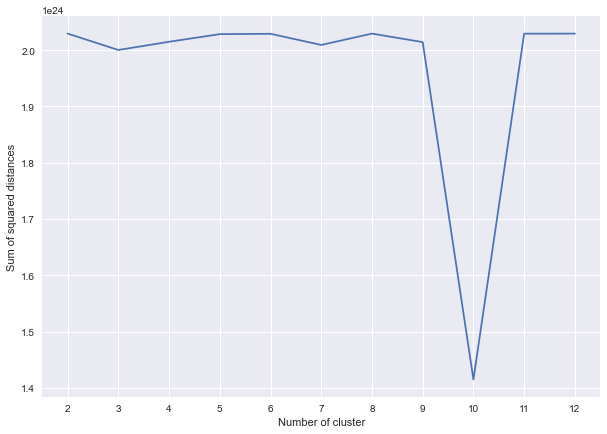

In [15]:
plt.style.use('seaborn')

#Sum of distances of samples to their closest cluster center
plt.figure(figsize=(10,7))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xticks(list(sse.keys()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of squared distances")

plt.show()

In [16]:
train_predictions = {}
normal_count = pd.value_counts(y_train)[0]
fraud_count = pd.value_counts(y_train)[1]
for k in models:
    print('Model with K='+str(k)+'\n'+'=================================\n')
    train_predictions[k] = models.get(k).predict(X_train)
    print("Predicted for K="+str(k))
    loc = 0
    countdict = {}
    m_locs = set(np.where(y_train == 1)[0])
    for pred in train_predictions[k]:
        countdict[pred] = countdict.get(pred, 0) + 0
        if loc in m_locs:
            countdict[pred] = countdict.get(pred, 0) + 1
        loc = loc + 1
    for key, value in sorted(countdict.items()):
        non_mal = len((np.where(train_predictions[k] == key)[0]))-value
        print('Cluster '+str(key+1)+': \t Malicious: '+str(value)+ ' ('+str(round((value*100)/fraud_count,3))+'%)' +' \t Non-Malicious: '+str(non_mal)+' ('+str(round((non_mal*100)/normal_count,3))+'%)\n')
    print('\n')


Model with K=2

Predicted for K=2
Cluster 1: 	 Malicious: 5 (0.255%) 	 Non-Malicious: 32 (1.422%)

Cluster 2: 	 Malicious: 1956 (99.745%) 	 Non-Malicious: 2219 (98.578%)



Model with K=3

Predicted for K=3
Cluster 1: 	 Malicious: 2 (0.102%) 	 Non-Malicious: 2 (0.089%)

Cluster 2: 	 Malicious: 8 (0.408%) 	 Non-Malicious: 37 (1.644%)

Cluster 3: 	 Malicious: 1951 (99.49%) 	 Non-Malicious: 2212 (98.267%)



Model with K=4

Predicted for K=4
Cluster 1: 	 Malicious: 1 (0.051%) 	 Non-Malicious: 12 (0.533%)

Cluster 2: 	 Malicious: 388 (19.786%) 	 Non-Malicious: 960 (42.648%)

Cluster 3: 	 Malicious: 13 (0.663%) 	 Non-Malicious: 43 (1.91%)

Cluster 4: 	 Malicious: 1559 (79.5%) 	 Non-Malicious: 1236 (54.909%)



Model with K=5

Predicted for K=5
Cluster 1: 	 Malicious: 2 (0.102%) 	 Non-Malicious: 2 (0.089%)

Cluster 2: 	 Malicious: 6 (0.306%) 	 Non-Malicious: 34 (1.51%)

Cluster 3: 	 Malicious: 637 (32.483%) 	 Non-Malicious: 310 (13.772%)

Cluster 4: 	 Malicious: 987 (50.331%) 	 Non-Malicious

In [105]:
predictions = {}
normal_count = pd.value_counts(y_test)[0]
fraud_count = pd.value_counts(y_test)[1]
for k in models:
    print('Model with K='+str(k)+'\n'+'=================================\n')
    predictions[k] = models.get(k).predict(X_test)
    print("Predicted for K="+str(k))
    loc = 0
    countdict = {}
    m_locs = set(np.where(y_test == 1)[0])
    for pred in predictions[k]:
        countdict[pred] = countdict.get(pred, 0) + 0
        if loc in m_locs:
            countdict[pred] = countdict.get(pred, 0) + 1
        loc = loc + 1
    for key, value in sorted(countdict.items()):
        non_mal = len((np.where(predictions[k] == key)[0]))-value
        print('Cluster '+str(key+1)+': \t Malicious: '+str(value)+ ' ('+str(round((value*100)/fraud_count,3))+'%)' +' \t Non-Malicious: '+str(non_mal)+' ('+str(round((non_mal*100)/normal_count,3))+'%)\n')
    print('\n')


Model with K=2

Predicted for K=2
Cluster 1: 	 Malicious: 0 (0.0%) 	 Non-Malicious: 2 (0.797%)

Cluster 2: 	 Malicious: 218 (100.0%) 	 Non-Malicious: 249 (99.203%)



Model with K=3

Predicted for K=3
Cluster 1: 	 Malicious: 0 (0.0%) 	 Non-Malicious: 1 (0.398%)

Cluster 2: 	 Malicious: 0 (0.0%) 	 Non-Malicious: 1 (0.398%)

Cluster 3: 	 Malicious: 218 (100.0%) 	 Non-Malicious: 249 (99.203%)



Model with K=4

Predicted for K=4
Cluster 1: 	 Malicious: 0 (0.0%) 	 Non-Malicious: 1 (0.398%)

Cluster 2: 	 Malicious: 35 (16.055%) 	 Non-Malicious: 127 (50.598%)

Cluster 3: 	 Malicious: 1 (0.459%) 	 Non-Malicious: 2 (0.797%)

Cluster 4: 	 Malicious: 182 (83.486%) 	 Non-Malicious: 121 (48.207%)



Model with K=5

Predicted for K=5
Cluster 1: 	 Malicious: 0 (0.0%) 	 Non-Malicious: 1 (0.398%)

Cluster 2: 	 Malicious: 0 (0.0%) 	 Non-Malicious: 1 (0.398%)

Cluster 3: 	 Malicious: 80 (36.697%) 	 Non-Malicious: 34 (13.546%)

Cluster 4: 	 Malicious: 108 (49.541%) 	 Non-Malicious: 99 (39.442%)

Cluster 

In [114]:
k = 12
cluster_df = X_test.copy()

#Tag Anomalies
anomaly_tag = []
loc = 0
m_locs = np.where(y_test == 1)[0]
for pred in predictions[k]:
    if loc in m_locs:
        anomaly_tag.append(1)
    else:
        anomaly_tag.append(0)
    loc = loc + 1
    
#Plot Clusters
cluster_df['cluster'] = predictions[k]
cluster_df['is_anomaly'] = anomaly_tag
cluster_df_plot = cluster_df.copy()
# cluster_df_plot = cluster_df.sample(100)

cluster_df_plot

,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received,...,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,cluster,is_anomaly
3639,5124.44,2328.97,864149.97,145,52,0,31,90,0.002108,70.095000,...,1.750000e+06,46922.850920,0.0,1750000.0,86633.45879,0.0,0.0,0.0,1,0
4322,0.00,25014.67,200117.38,0,8,1,2,0,0.000000,6.600000,...,8.045370e-01,0.439932,0.0,0.0,0.00000,0.0,0.0,0.0,6,0
3901,0.00,2223.58,200121.92,0,90,1,3,0,0.000000,0.629101,...,4.849930e-01,0.319424,0.0,0.0,0.00000,0.0,0.0,0.0,6,0
3020,0.00,0.00,32.03,1,1,0,1,1,0.555062,0.555062,...,0.000000e+00,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,9,0
3816,7610.37,4136.59,950657.47,101,44,0,24,40,0.141309,100.000000,...,4.311000e+06,160810.410900,0.0,900000.0,149248.66350,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,0.00,0.00,530.10,1,1,0,1,1,10.000000,10.000000,...,0.000000e+00,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,5,0
4372,86772.18,0.00,173544.37,2,1,0,1,2,2.095936,2.095936,...,3.207828e+02,107.049338,0.0,0.0,0.00000,0.0,0.0,0.0,6,0
4567,0.00,5040.79,60489.52,0,12,1,3,0,0.000000,23.990000,...,0.000000e+00,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,11,0
4169,0.00,2704.32,200119.98,0,74,1,4,0,0.000000,1.003325,...,5.275530e-01,0.480929,0.0,0.0,0.00000,0.0,0.0,0.0,6,0


In [115]:
comp = 3
pca = PCA(n_components=comp)
trimmed_cluster_df_plot = cluster_df_plot.iloc[:,0:5]
pca.fit(trimmed_cluster_df_plot)
trimmed_cluster_df_plot.head()

,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx
3639,5124.44,2328.97,864149.97,145,52
4322,0.00,25014.67,200117.38,0,8
3901,0.00,2223.58,200121.92,0,90
3020,0.00,0.00,32.03,1,1
3816,7610.37,4136.59,950657.47,101,44


In [116]:
columns = ['pca_%i' % i for i in range(comp)]
df_pca = pd.DataFrame(pca.transform(trimmed_cluster_df_plot), columns=columns, index=trimmed_cluster_df_plot.index)
df_pca['cluster'] = cluster_df_plot['cluster']
df_pca['is_anomaly'] = cluster_df_plot['is_anomaly']
df_pca.head()

,pca_0,pca_1,pca_2,cluster,is_anomaly
3639,729094.102356,-14980.580630,-9838.294405,1,0
4322,65637.105990,9097.320957,17086.475431,6,0
3901,65180.910804,-5552.299528,-366.484203,6,0
3020,-134904.132435,-2937.306369,-183.650104,9,0
3816,815639.997661,-13663.061972,-10867.657184,1,0


IndexError: list index out of range

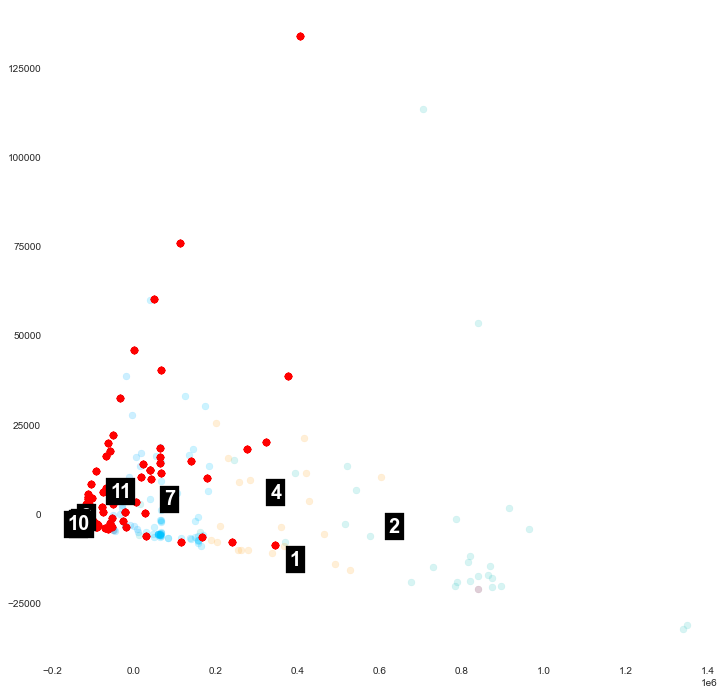

In [117]:
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#720cd2', '#FFB139', '#0004FF', '#04FF00', '#00C3FF', '#FFD800', '#00F3FF', '#7000FF', '#00B2FF']
sns.set_palette(customPalette)
#sns.palplot(customPalette)

groups = {}
for i in range(0, k):
    groups[i] = i

#create a new figure
plt.figure(figsize=(12,12))

#loop through labels and plot each cluster
for i, label in enumerate(groups.keys()):
    #add data points 
    plt.scatter(x=df_pca.loc[df_pca['cluster']==label, 'pca_0'], 
                y=df_pca.loc[df_pca['cluster']==label,'pca_1'], 
                color=customPalette[i], 
                alpha=0.20)
    #add label
    plt.annotate((int(label)+1), 
             df_pca.loc[df_pca['cluster']==label,['pca_0','pca_1']].mean(),
             horizontalalignment='center',
             verticalalignment='center',
             size=20, weight='bold',
             color='white',
             backgroundcolor='#000000') 
    
    #mark anomalies
    plt.scatter(x=df_pca.loc[df_pca['is_anomaly']==1, 'pca_0'], 
                y=df_pca.loc[df_pca['is_anomaly']==1,'pca_1'], 
                color='#FF0000', 
                alpha=1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


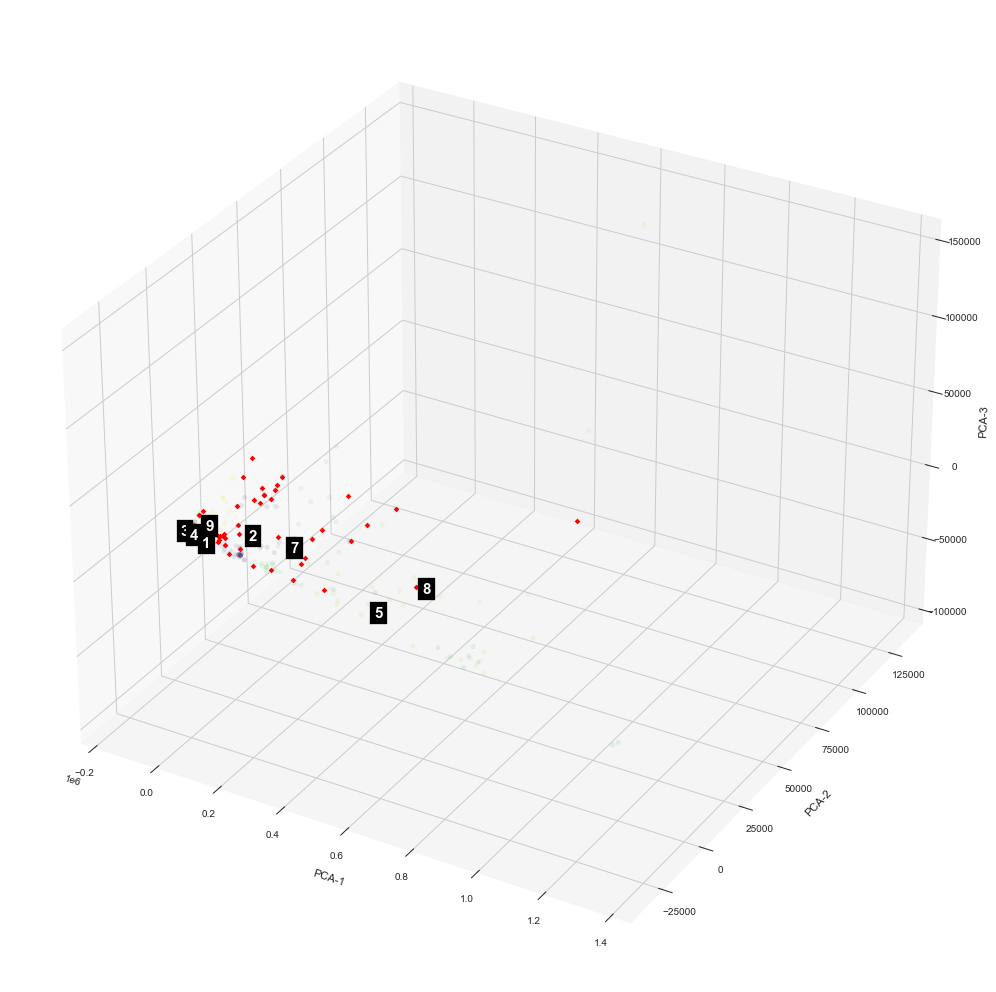

In [ ]:
#%matplotlib notebook
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')

x = df_pca['pca_0']
y = df_pca['pca_1']
z = df_pca['pca_2']

ax.scatter(x, y, z, c=df_pca['cluster'], marker='o', cmap="viridis", alpha=0.1)


for i, label in enumerate(groups.keys()):
    cx = df_pca.loc[df_pca['cluster']==label,['pca_0','pca_1','pca_2']].mean()[0]
    cy = df_pca.loc[df_pca['cluster']==label,['pca_0','pca_1','pca_2']].mean()[1]
    cz = df_pca.loc[df_pca['cluster']==label,['pca_0','pca_1','pca_2']].mean()[2]
    ax.text(cx,cy,cz,  '%s' % (str(label+1)), size=15, horizontalalignment='center',
             verticalalignment='center', weight='bold', color='white', backgroundcolor='#000000') 


ax.plot(df_pca.loc[df_pca['is_anomaly']==1, 
                   'pca_0'], df_pca.loc[df_pca['is_anomaly']==1,'pca_1'], 
        df_pca.loc[df_pca['is_anomaly']==1,'pca_2'], 'D', markersize=4, c='r')


ax.set_xlabel('\n\nPCA-1')
ax.set_ylabel('\n\nPCA-2')
ax.set_zlabel('\n\nPCA-3')

plt.show()

# print('ax.azim {}'.format(ax.azim))
# print('ax.elev {}'.format(ax.elev))


In [118]:
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score

def evaluation_summary(test_y, predictions, clf_name):
    print('For ' + clf_name)
    print('Balanced Accuracy: '+ str(round(balanced_accuracy_score(test_y, predictions),7)))
    print('Macro Precision: '+ str(round(precision_score(test_y, predictions, average="macro"),7)))
    print('Macro Recall: '+ str(round(recall_score(test_y,predictions, average="macro"),7)))
    print('Macro F1: '+ str(round(f1_score(test_y,predictions, average="macro"),7)))
    print('\n')
    
    print('Normal Accuracy: '+ str(round(accuracy_score(test_y, predictions),7)))
    print('Normal Precision: '+ str(round(precision_score(test_y, predictions),7)))
    print('Normal Recall: '+ str(round(recall_score(test_y,predictions),7)))
    print('Normal F1: '+ str(round(f1_score(test_y,predictions),7)))
    print('\n')
    print(classification_report(test_y, predictions, labels=[0, 1]))
    print('\n')

In [119]:
print('For K='+str(k))
merge = [4,2]

prediction = predictions[k].copy()
t_prediction = train_predictions[k].copy()


if len(pd.value_counts(t_prediction)) > 2 and len(pd.value_counts(prediction)) > 2:
    for i in range(0,k):
        if (i+1) in merge:
            prediction[prediction == i] = -1
            t_prediction[t_prediction == i] = -1
        else:
            prediction[prediction == i] = 0
            t_prediction[t_prediction == i] = 0

    prediction[prediction == -1] = 1
    t_prediction[t_prediction == -1] = 1

    print('Train Cluster Merge Result:\n')
    print(pd.value_counts(t_prediction))

    print('\n\nTest Cluster Merge Result:\n')
    print(pd.value_counts(prediction))

For K=12
Train Cluster Merge Result:

0    3661
1     551
dtype: int64


Test Cluster Merge Result:

0    408
1     61
dtype: int64


In [124]:
evaluation_summary(y_test, prediction, 'K-means (K='+str(k)+')')

For K-means (K=12)
Balanced Accuracy: 0.4127709
Macro Precision: 0.3082208
Macro Recall: 0.4127709
Macro F1: 0.3291291


Normal Accuracy: 0.4392324
Normal Precision: 0.1311475
Normal Recall: 0.0366972
Normal F1: 0.0573477


              precision    recall  f1-score   support

           0       0.49      0.79      0.60       251
           1       0.13      0.04      0.06       218

    accuracy                           0.44       469
   macro avg       0.31      0.41      0.33       469
weighted avg       0.32      0.44      0.35       469



